In [294]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [295]:
#Read in the csv file and convert to a Pandas dataframe
Jadarat_data = pd.read_csv("C:\\Users\\alabd\\Downloads\\Usecase-5\\Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [296]:
Jadarat_data.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both


In [297]:
Jadarat_data.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both


In [298]:
#2- Get the shape of the DataFrame there is 18 coloms and 1470 row 
Jadarat_data.shape

(1470, 18)

In [299]:
# describe the object
print(Jadarat_data.describe(include=['object']))

       job_title    job_date  \
count       1470        1470   
unique       324          92   
top         بائع  09/06/1444   
freq          98          47   

                                                 job_desc  \
count                                                1470   
unique                                                438   
top     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...   
freq                                                   93   

                                                job_tasks  \
count                                                1470   
unique                                                444   
top     ['   بيع مجموعة من السلع والخدمات للعملاء.', '...   
freq                                                   90   

                                                comp_name   comp_no comp_type  \
count                                                1470      1470      1470   
unique                                                886       8

In [300]:
# Jadarat_data['eco_activity'].isnull().sum()
Jadarat_data[Jadarat_data['qualif'].isnull()]
# qualif الاعمده اللي فيها قيم مفقودة غير مهمة بأجوبة حقت البروبلم لكن عندي مشكله في ال 


,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
14,مصمم جرافيك,26/05/1444,['لديه الخبرة في اخراج العروض التقديمية الرس...,['لديه الخبرة في اخراج العروض التقديمية الرس...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026349504,4 Years,M
15,مدخل بيانات,26/05/1444,['التمكن من استخدام برامج مايكروسفت أوفيس'],['التمكن من استخدام برامج مايكروسفت أوفيس'],مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '3000.0']",دوام كامل,0 / 2,20202026349475,2 Years,M
16,مطور برامج,26/05/1444,[' تحليل وادارة تطبيقات باستخدام الأدوات البر...,[' تحليل وادارة تطبيقات باستخدام الأدوات ال...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '9000.0']",دوام كامل,0 / 1,20202026349439,4 Years,M
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '12000.0']",دوام كامل,0 / 1,20202026349417,10 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,أخصائي عمليات موارد بشرية,25/06/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركـة ذوق للتجارة,1-1526321,خاص,صغيرة فئة ب,البيع بالتجزئة للوكلاء بالعمولة بدون محلات,NaN,الرياض,AR RIYADH...,"['Salary', '5556.0']",دوام كامل,0 / 1,20202026403956,0 Years,F
1455,فني تصميم داخلي,24/06/1444,['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...,[' وضع التصاميم للمشروعات الداخلية، وإدارة ف...,شركة نمو للبحوث والدراسات (شركة شخص واحد),1-2166711,خاص,صغيرة فئة أ,مراكز البحوث والدراسات الاجتماعية,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0', 'Benefits', 'عموله']",دوام كامل,0 / 1,20202026403328,2 Years,both
1460,كيميائي,23/06/1444,['دراسة خصائص المواد الكميائية للصناعات الكيمي...,[' إعداد برامج تشغيل الأجهزة والمعدات المخبر...,شركة نواف صالح البطي للتجارة,1-2604723,خاص,صغيرة فئة ب,تجارة الجملة والتجزئه في أنواع أخرى من المركبا...,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026402275,0 Years,F
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401107,2 Years,F


In [301]:
 print(Jadarat_data['qualif'].value_counts())

qualif
['Language data', 'الانجليزية', 'متوسط']                                                                                                                                                                                                                                      28
['Language data', 'الانجليزية', 'محترف']                                                                                                                                                                                                                                      11
['Language data', 'اللغة الانجليزية', 'محترف']                                                                                                                                                                                                                                10
['Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']                                                                                                                  

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [302]:
# 1- Disblay all columns
Jadarat_data.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [303]:
# 2- Disblay all information available
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [304]:
# 3- Display summary statistics for categorical columns
Jadarat_data.describe(include="object")

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


In [305]:
# 4- Display summary statistics for numerical columns
Jadarat_data.describe(include="number")

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


In [306]:
# 5- Check for duplicated values in the DataFrame
Jadarat_data.duplicated().sum()

1

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [307]:
# uptodate data 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [308]:
#the data is up to date 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [309]:
Jadarat_data.dtypes
# the colne exp shold be int tybe 
# the colne benefits shold be int 
# position is weird 

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [310]:
Jadarat_data.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


In [ ]:
def fix_positions(x):
    if '/' in str(x):
        
        right_value = x.split('/')[-1].strip()
        return pd.to_numeric(right_value, errors='coerce')
    else:
       
        return pd.to_numeric(x, errors='coerce')


Jadarat_data['positions'] = Jadarat_data['positions'].apply(fix_positions)


Jadarat_data['positions'] = Jadarat_data['positions'].fillna(0).astype(int)


 

In [312]:
Jadarat_data.dtypes
# change the colomn position to int

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions        int32
job_post_id      int64
exper           object
gender          object
dtype: object

In [313]:
Jadarat_data.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,2,20202026350347,2 Years,both


In [ ]:
#change the tybe of benefits colom
# حذف كلمة 'Years' وأي مسافات من كولوم exper
Jadarat_data['exper'] = Jadarat_data['exper'].str.replace('Years', '').str.strip()
Jadarat_data['exper'] = pd.to_numeric(Jadarat_data['exper'], errors='coerce').fillna(0).astype(int)


In [315]:
Jadarat_data.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1,20202026350419,0,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,3,20202026350389,0,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,2,20202026350347,2,both


In [316]:
# إعادة تسمية كولوم 'exper' إلى 'exper_years'
Jadarat_data.rename(columns={'exper': 'exper_years'}, inplace=True)


In [317]:
Jadarat_data.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper_years,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1,20202026350419,0,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,3,20202026350389,0,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,2,20202026350347,2,both


In [ ]:
#cheick the coloms tybe
Jadarat_data.dtypes


job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions        int32
job_post_id      int64
exper_years      int32
gender          object
dtype: object

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [ ]:
#check the duplicates
duplicates_count = Jadarat_data.apply(lambda x: x.duplicated().sum())


print(duplicates_count)


job_title       1146
job_date        1378
job_desc        1032
job_tasks       1026
comp_name        584
comp_no          576
comp_type       1468
comp_size       1462
eco_activity    1108
qualif           854
region          1456
city            1356
benefits        1077
contract        1468
positions       1454
job_post_id       89
exper_years     1464
gender          1467
dtype: int64


In [ ]:
#check the duplicates in region
duplicates_region = Jadarat_data[Jadarat_data.duplicated(subset=['region'], keep=False)]
print(duplicates_region[['region']])


               region
0              الرياض
1     المنطقة الشرقية
2              الرياض
3     المنطقة الشرقية
4              الرياض
...               ...
1465           الرياض
1466      مكة المكرمة
1467           الرياض
1468  المنطقة الشرقية
1469           الرياض

[1469 rows x 1 columns]


In [ ]:
#check the duplicates in positions
duplicates_positions = Jadarat_data[Jadarat_data.duplicated(subset=['positions'], keep=False)]


print(duplicates_positions[['positions']])

      positions
0             1
1             3
2             2
3            10
4             1
...         ...
1465          1
1466          1
1467          1
1468          3
1469          1

[1468 rows x 1 columns]


In [ ]:
#check the duplicates in job_desc 
duplicates_job_desc= Jadarat_data[Jadarat_data.duplicated(subset=['job_desc'], keep=False)]

print(duplicates_job_desc[['job_desc']])

                                               job_desc
0     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...
1     ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...
2     ['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...
3     ['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...
4     ['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...
...                                                 ...
1464  ['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...
1465  ['دراسة احتياجات العميل من الأجهزة الحاسوبية و...
1466  ['دعم المدير أو الإدارة من خلال كتابة الوثائق ...
1467  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...
1469  ['دراسة التركيبات الدوائية للعقاقير والعلاجات ...

[1213 rows x 1 columns]


In [ ]:
print(Jadarat_data['job_desc'].sample(5).values)


["['بيع المأكولات و المشروبات للزبائن، وتوفير المعلومات المتعلقة بالمأكولات و المشروبات و أسعارها، وتولي أمور الدفع وتلقي المدفوعات من الزبائن.']"
 "['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات الفحص وإجراء الفحوص المخبرية،واستخراج النتائج وتقديمها للاختصاصي المشرف،واتلاف العينات المخبرية بعد إجراء الفحوص، وإعداد وتقديم تقارير العمل.']"
 "['اخصائي قياس فحص النظر ']"
 "['متابعة تطبيق القوانين واللوائح التنظيمية والتعليمات المتعلقة بالسلامة والصحة المهنية في المنشآت وقياس العوامل البيئية والتحقيق في الحوادث والاصابات واعداد تعليمات واجراءات وملصقات السلامة والصحة المهنية واعداد وتقديم تقارير العمل']"
 "['تقديم الدعم والمساعدة الفنية للموظفين والعملاء الذين تواجههم مشاكل في شبكات تقنية المعلومات ومساندتهم، وتحديد الأدوات والمستلزمات المطلوبة للقيام بأعمال دعم الموظفين والعملاء وحل المشاكل التي تواجههم، وتوفير المعلومات الفنية الخاصة بأجهزة ونظم وبرامج تقنية المعلومات، وحفظ البيانات والمعلومات المتعلقة بعمليات الدعم الفني وإعداد وتقديم تقارير العمل.']"]


In [ ]:
duplicates_exper_years = Jadarat_data[Jadarat_data.duplicated(subset=['exper_years'], keep=False)]

print(duplicates_exper_years[['exper_years']])

      exper_years
0               0
1               0
2               2
3               0
4               0
...           ...
1465            0
1466            2
1467            0
1468            0
1469            0

[1470 rows x 1 columns]


In [326]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
#Display number missing values per column
null_counts = Jadarat_data.isnull().sum()
print(null_counts)


job_title         0
job_date          0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     90
qualif          690
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper_years       0
gender            0
dtype: int64


In [328]:
Jadarat_data['qualif'].fillna('غير محدد', inplace=True)


C:\Users\alabd\AppData\Local\Temp\ipykernel_17796\3876902321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Jadarat_data['qualif'].fillna('غير محدد', inplace=True)


In [329]:
null_counts = Jadarat_data.isnull().sum()
print(null_counts)

job_title        0
job_date         0
job_desc         0
job_tasks        0
comp_name        0
comp_no          0
comp_type        0
comp_size       14
eco_activity    90
qualif           0
region           0
city             0
benefits         0
contract         0
positions        0
job_post_id      0
exper_years      0
gender           0
dtype: int64


In [330]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [331]:
# check columns types 
Jadarat_data.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions        int32
job_post_id      int64
exper_years      int32
gender          object
dtype: object

In [332]:
# go to clean them 

In [333]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [334]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [335]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [336]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [ ]:
#benefits
Jadarat_data['salary'] = Jadarat_data['benefits'].str.extract(r'Salary\', \'(\d+\.?\d*)').astype(float)
fresh_graduates_salaries = Jadarat_data[(Jadarat_data['exper_years'] == 0) & (Jadarat_data['salary'].notnull())]['salary']
print(fresh_graduates_salaries.describe())


count      833.000000
mean      4712.236495
std       1123.903061
min       3000.000000
25%       4000.000000
50%       4000.000000
75%       5000.000000
max      12325.000000
Name: salary, dtype: float64


In [338]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [339]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [ ]:
numeric_cols = ['positions', 'exper_years']


def find_outliers_iqr(Jadarat_data, col):
    Q1 = Jadarat_data[col].quantile(0.25)
    Q3 = Jadarat_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = Jadarat_data[(Jadarat_data[col] < lower_bound) | (Jadarat_data[col] > upper_bound)]
    return outliers

for col in numeric_cols:
    outliers = find_outliers_iqr(Jadarat_data, col)
    print(f"Outliers in {col}:")
    print(outliers[[col]])
    print("-" * 40)


Outliers in positions:
      positions
3            10
10            4
11            5
12            4
23            4
...         ...
1424          5
1444          5
1447          4
1452          6
1458          5

[232 rows x 1 columns]
----------------------------------------
Outliers in exper_years:
      exper_years
17             10
82              7
109             7
163             7
166             7
167             7
170             7
174             7
229            12
246            12
422             7
428             7
429            10
442            10
458            12
506            10
530             7
558            10
575             7
577             7
578            10
628             7
749            10
841            10
858             7
888            10
901             7
947            10
1132           10
1144            7
1169           10
1171           10
1180            7
1184            7
1190            7
1204            7
1239            7
1247       

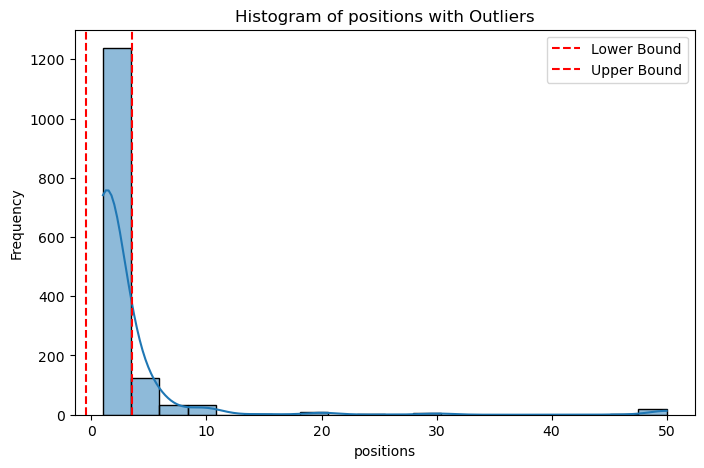

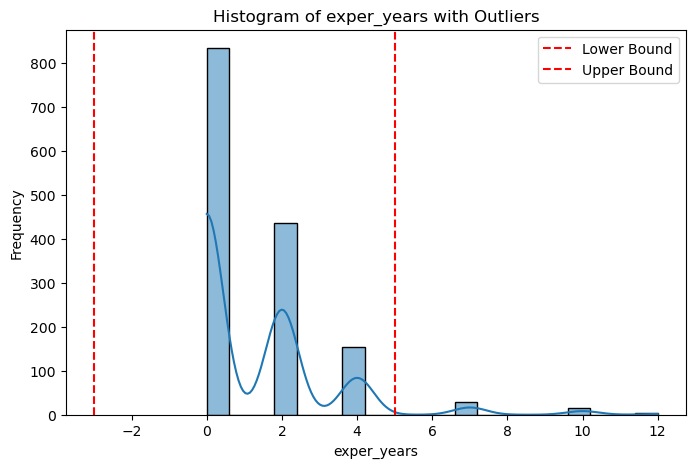

In [ ]:


numeric_cols = ['positions', 'exper_years']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(Jadarat_data[col], bins=20, kde=True)

    
    Q1 = Jadarat_data[col].quantile(0.25)
    Q3 = Jadarat_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    
    plt.title(f'Histogram of {col} with Outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

# Q1

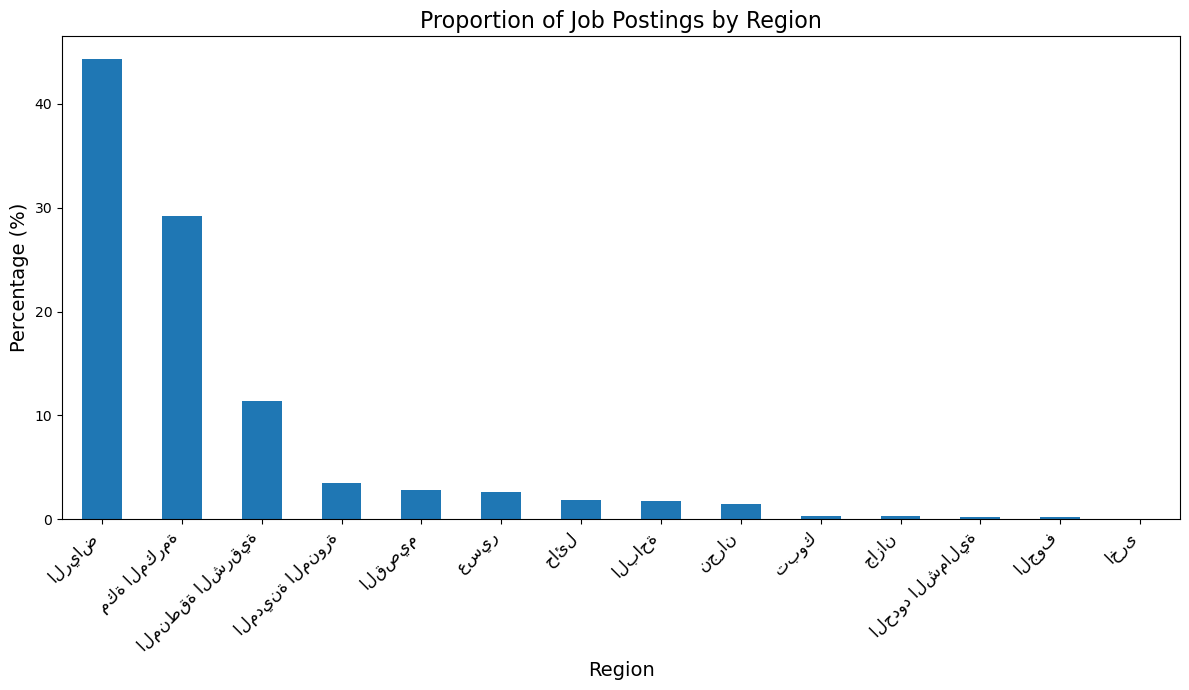

In [346]:



plt.figure(figsize=(12, 7))
region_jobs_percentage.plot(kind='bar')


plt.title('Proportion of Job Postings by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=12)


plt.tight_layout()


plt.show()


# Q2

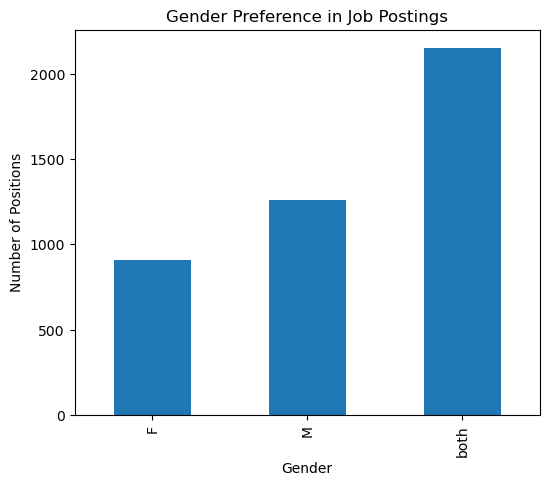

In [ ]:

gender_jobs = Jadarat_data.groupby('gender')['positions'].sum()

gender_jobs.plot(kind='bar', figsize=(6, 5))
plt.title('Gender Preference in Job Postings')
plt.xlabel('Gender')
plt.ylabel('Number of Positions')
plt.show()

# Q3

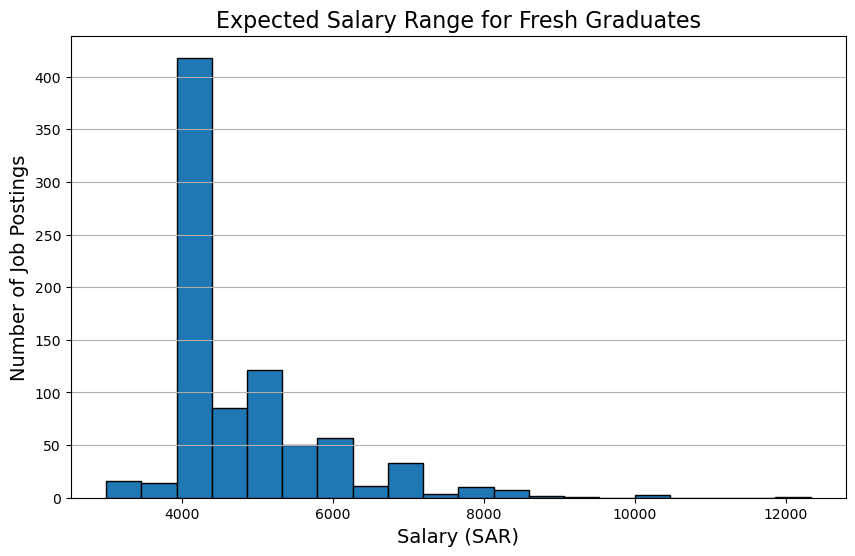

In [ ]:

Jadarat_data['salary'] = Jadarat_data['benefits'].str.extract(r'Salary\', \'(\d+\.?\d*)').astype(float)


fresh_graduates_salaries = Jadarat_data[(Jadarat_data['exper_years'] == 0) & (Jadarat_data['salary'].notnull())]['salary']

plt.figure(figsize=(10, 6))
plt.hist(fresh_graduates_salaries, bins=20, edgecolor='black')


plt.title('Expected Salary Range for Fresh Graduates', fontsize=16)
plt.xlabel('Salary (SAR)', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)
plt.grid(axis='y')


plt.show()


# Q4

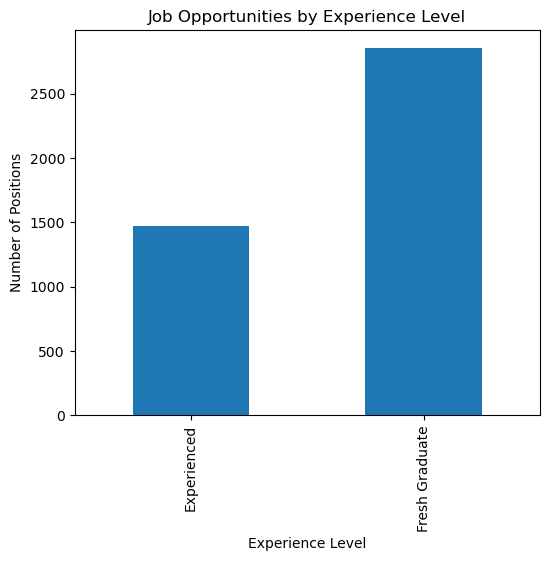

In [ ]:

Jadarat_data['experience_level'] = Jadarat_data['exper_years'].apply(lambda x: 'Fresh Graduate' if x == 0 else 'Experienced')
exper_jobs = Jadarat_data.groupby('experience_level')['positions'].sum()

exper_jobs.plot(kind='bar', figsize=(6, 5))
plt.title('Job Opportunities by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Positions')
plt.show()


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.